In [54]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib.ticker as mticker
import os

plt.style.use(hep.style.CMS)
hep.style.use("CMS")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 20})

In [2]:
MAIN_DIR = "../../../"

plot_dir = f"{MAIN_DIR}/plots/GoF/Mar7"
_ = os.system(f"mkdir -p {plot_dir}")

In [37]:
cards_dir = "Mar3"

file = uproot.concatenate(
    f"/uscms/home/rkansal/nobackup/CMSSW_11_2_0/src/cards/{cards_dir}/higgsCombinepassData.GoodnessOfFit.mH125.root"
)

data_ts = file["limit"][0]  # data test statistic

file = uproot.concatenate(
    f"/uscms/home/rkansal/nobackup/CMSSW_11_2_0/src/cards/{cards_dir}/higgsCombinepassToys.GoodnessOfFit.mH125.*.root"
)

toy_ts = np.array(file["limit"])  # toy test statistics

In [48]:
pval = np.sum(toy_ts > data_ts) / len(toy_ts)

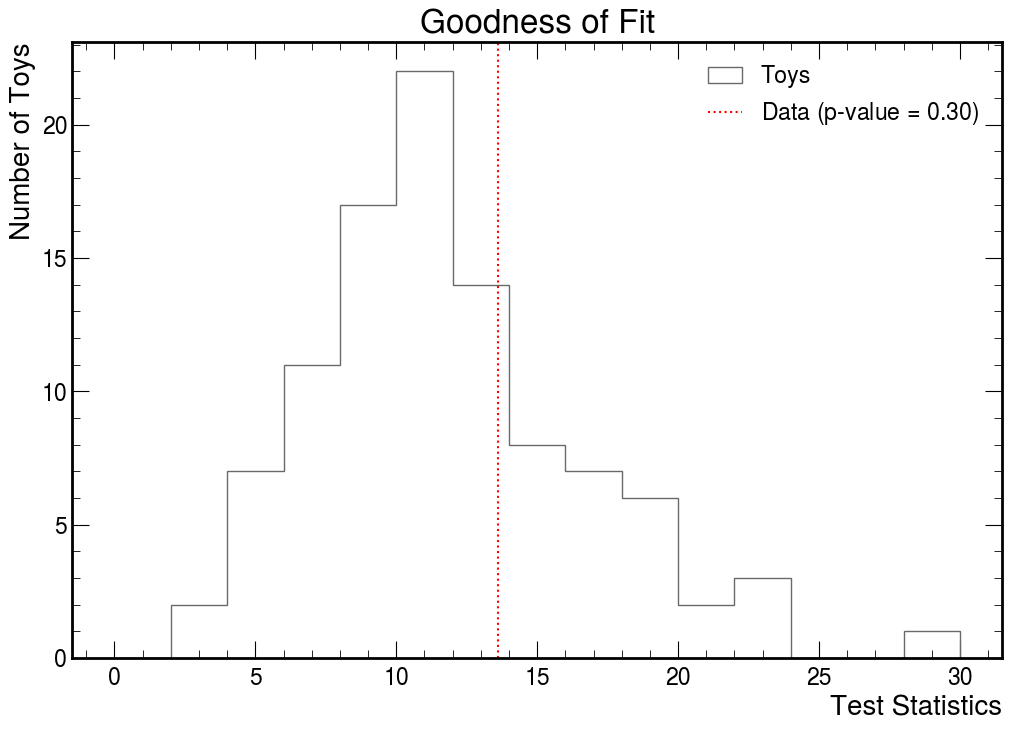

In [72]:
plt.figure(figsize=(12, 8))
_ = plt.hist(toy_ts, np.linspace(0, 30, 16), color="dimgrey", histtype="step", label="Toys")
plt.axvline(data_ts, color="red", linestyle=":", label=rf"Data ($p$-value = {pval:.2f})")
_ = plt.legend()
plt.title("Goodness of Fit")
plt.ylabel("Number of Toys")
plt.xlabel("Test Statistics")
plt.savefig(f"{plot_dir}/gof.pdf")

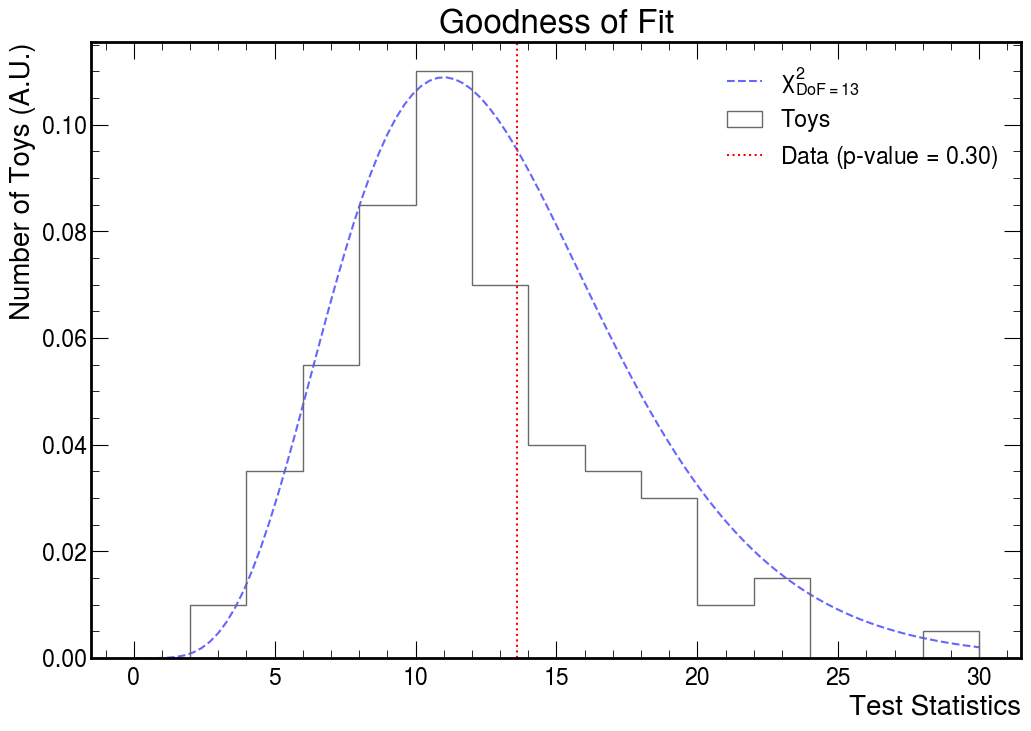

In [73]:
from scipy.stats import chi2

chi2_df = 13

plt.figure(figsize=(12, 8))
x = np.linspace(0, 30, 101)
plt.plot(
    x,
    chi2.pdf(x, chi2_df) * 1.3,
    color="blue",
    linestyle="--",
    alpha=0.6,
    label=rf"$\chi^2_{{DoF = {chi2_df}}}$",
)
_ = plt.hist(
    toy_ts, np.linspace(0, 30, 16), density=True, color="dimgrey", histtype="step", label="Toys"
)
plt.axvline(data_ts, color="red", linestyle=":", label=rf"Data ($p$-value = {pval:.2f})")
_ = plt.legend()
plt.title("Goodness of Fit")
plt.ylabel("Number of Toys (A.U.)")
plt.xlabel("Test Statistics")
plt.savefig(f"{plot_dir}/gof_chi2.pdf")